### import libreries which I needed

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### read covid data in df

In [2]:
df = pd.read_csv('covid_data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,1/5/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/6/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/7/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/8/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/9/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,7/31/2024,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,8/1/2024,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,8/2/2024,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,8/3/2024,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [4]:
df.shape

(429435, 67)

### Filter my countries from data set 

In [5]:
Countries = df[(df['location']=='Malawi') | (df['location']=='Malaysia') | (df['location']=='Maldives') | (df['location']=='Mali') | (df['location']=='Malta')| (df['location']=='Marshall Islands')| (df['location']=='Martinique')| (df['location']=='Mauritania')|(df['location']=='Mauritius')|(df['location']=='Mayotte')|(df['location']=='Mexico')]
Countries

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
226944,MWI,Africa,Malawi,1/5/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,24.7,8.704,1.30,64.26,0.483,20405318,NaN,NaN,NaN,NaN
226945,MWI,Africa,Malawi,1/6/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,24.7,8.704,1.30,64.26,0.483,20405318,NaN,NaN,NaN,NaN
226946,MWI,Africa,Malawi,1/7/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,24.7,8.704,1.30,64.26,0.483,20405318,NaN,NaN,NaN,NaN
226947,MWI,Africa,Malawi,1/8/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,24.7,8.704,1.30,64.26,0.483,20405318,NaN,NaN,NaN,NaN
226948,MWI,Africa,Malawi,1/9/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,24.7,8.704,1.30,64.26,0.483,20405318,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245367,MEX,North America,Mexico,7/31/2024,7619118.0,0.0,122.857,334551.0,0.0,1.286,...,21.4,87.847,1.38,75.05,0.779,127504120,NaN,NaN,NaN,NaN
245368,MEX,North America,Mexico,8/1/2024,7619118.0,0.0,122.857,334551.0,0.0,1.286,...,21.4,87.847,1.38,75.05,0.779,127504120,NaN,NaN,NaN,NaN
245369,MEX,North America,Mexico,8/2/2024,7619118.0,0.0,122.857,334551.0,0.0,1.286,...,21.4,87.847,1.38,75.05,0.779,127504120,NaN,NaN,NaN,NaN
245370,MEX,North America,Mexico,8/3/2024,7619118.0,0.0,122.857,334551.0,0.0,1.286,...,21.4,87.847,1.38,75.05,0.779,127504120,NaN,NaN,NaN,NaN


In [6]:
Countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18428 entries, 226944 to 245371
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    18428 non-null  object 
 1   continent                                   18428 non-null  object 
 2   location                                    18428 non-null  object 
 3   date                                        18428 non-null  object 
 4   total_cases                                 18414 non-null  float64
 5   new_cases                                   18410 non-null  float64
 6   new_cases_smoothed                          18355 non-null  float64
 7   total_deaths                                18414 non-null  float64
 8   new_deaths                                  18414 non-null  float64
 9   new_deaths_smoothed                         18359 non-null  float64
 10  total_cas

In [7]:
Countries.shape

(18428, 67)

### Data preprocessing of Countries 

In [8]:
for c in Countries.columns:
     if (Countries[c].dtype=='object'):
        print(c , Countries[c].dtype, Countries[c].isna().sum())

iso_code object 0
continent object 0
location object 0
date object 0
tests_units object 12958


In [9]:
Countries = Countries.drop('tests_units',axis = 1)

In [10]:
for c in Countries.columns:
     if (Countries[c].dtype=='object'):
        print(c , Countries[c].dtype, Countries[c].isna().sum())

iso_code object 0
continent object 0
location object 0
date object 0


In [11]:
for c in Countries.columns:
     if (Countries[c].dtype=='int64'):
        print(c , Countries[c].dtype, Countries[c].isna().sum())

population int64 0


In [12]:
for c in Countries.columns:
     if (Countries[c].dtype=='float64'):
        print(c , Countries[c].dtype, Countries[c].isna().sum())

total_cases float64 14
new_cases float64 18
new_cases_smoothed float64 73
total_deaths float64 14
new_deaths float64 14
new_deaths_smoothed float64 69
total_cases_per_million float64 14
new_cases_per_million float64 18
new_cases_smoothed_per_million float64 73
total_deaths_per_million float64 14
new_deaths_per_million float64 14
new_deaths_smoothed_per_million float64 69
reproduction_rate float64 10320
icu_patients float64 16636
icu_patients_per_million float64 16636
hosp_patients float64 16831
hosp_patients_per_million float64 16831
weekly_icu_admissions float64 18341
weekly_icu_admissions_per_million float64 18341
weekly_hosp_admissions float64 16645
weekly_hosp_admissions_per_million float64 16645
total_tests float64 14717
new_tests float64 14936
total_tests_per_thousand float64 14717
new_tests_per_thousand float64 14936
new_tests_smoothed float64 13021
new_tests_smoothed_per_thousand float64 13021
positive_rate float64 13231
tests_per_case float64 13534
total_vaccinations float64 1

In [13]:
Countries = Countries.drop(['new_vaccinations_smoothed','new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred','stringency_index','reproduction_rate','new_tests_smoothed','new_tests_smoothed_per_thousand','icu_patients','icu_patients_per_million','hosp_patients','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','total_tests','new_tests','total_tests_per_thousand','new_tests_per_thousand','total_vaccinations','people_vaccinated','people_fully_vaccinated','total_boosters','new_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred','excess_mortality_cumulative_absolute','tests_per_case','positive_rate','excess_mortality_cumulative','excess_mortality','excess_mortality_cumulative_per_million'],axis = 1)
Countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18428 entries, 226944 to 245371
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         18428 non-null  object 
 1   continent                        18428 non-null  object 
 2   location                         18428 non-null  object 
 3   date                             18428 non-null  object 
 4   total_cases                      18414 non-null  float64
 5   new_cases                        18410 non-null  float64
 6   new_cases_smoothed               18355 non-null  float64
 7   total_deaths                     18414 non-null  float64
 8   new_deaths                       18414 non-null  float64
 9   new_deaths_smoothed              18359 non-null  float64
 10  total_cases_per_million          18414 non-null  float64
 11  new_cases_per_million            18410 non-null  float64
 12  new_cases_smoothe

In [14]:
for c in Countries.columns:
     if (Countries[c].dtype=='float64'):
        print(c , Countries[c].dtype, Countries[c].isna().sum())

total_cases float64 14
new_cases float64 18
new_cases_smoothed float64 73
total_deaths float64 14
new_deaths float64 14
new_deaths_smoothed float64 69
total_cases_per_million float64 14
new_cases_per_million float64 18
new_cases_smoothed_per_million float64 73
total_deaths_per_million float64 14
new_deaths_per_million float64 14
new_deaths_smoothed_per_million float64 69
population_density float64 3348
median_age float64 1674
aged_65_older float64 5022
aged_70_older float64 1674
gdp_per_capita float64 3348
extreme_poverty float64 8370
cardiovasc_death_rate float64 3348
diabetes_prevalence float64 3348
female_smokers float64 6696
male_smokers float64 6696
handwashing_facilities float64 8380
hospital_beds_per_thousand float64 6696
life_expectancy float64 0
human_development_index float64 3348


In [15]:
Countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18428 entries, 226944 to 245371
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         18428 non-null  object 
 1   continent                        18428 non-null  object 
 2   location                         18428 non-null  object 
 3   date                             18428 non-null  object 
 4   total_cases                      18414 non-null  float64
 5   new_cases                        18410 non-null  float64
 6   new_cases_smoothed               18355 non-null  float64
 7   total_deaths                     18414 non-null  float64
 8   new_deaths                       18414 non-null  float64
 9   new_deaths_smoothed              18359 non-null  float64
 10  total_cases_per_million          18414 non-null  float64
 11  new_cases_per_million            18410 non-null  float64
 12  new_cases_smoothe

In [16]:
for c in Countries.columns:
     if (Countries[c].dtype=='float64' and Countries[c].isna().sum()>0):
        print(c , Countries[c].mean())
        Countries[c]= Countries[c].fillna(Countries[c].mean())
    

total_cases 758858.8570109699
new_cases 762.76463878327
new_cases_smoothed 764.9799536366113
total_deaths 25464.72314543282
new_deaths 20.633594004561747
new_deaths_smoothed 20.695387493872214
total_cases_per_million 111687.6156294667
new_cases_per_million 124.0194028788702
new_cases_smoothed_per_million 124.38237079814763
total_deaths_per_million 670.3134631258824
new_deaths_per_million 0.6207266210492016
new_deaths_smoothed_per_million 0.6225026417560869
population_density 467.01244907161805
median_age 29.020592097409573
aged_65_older 7.034018797553334
aged_70_older 4.781668735824281
gdp_per_capita 14082.699238461537
extreme_poverty 13.432372241002186
cardiovasc_death_rate 250.81380663129977
diabetes_prevalence 12.131083554376657
female_smokers 5.7249403341288785
male_smokers 33.91725196045005
handwashing_facilities 57.18521098726112
hospital_beds_per_thousand 2.1802020115922263
human_development_index 0.6884380636604777


In [17]:
for c in Countries.columns:
     if (Countries[c].dtype=='float64' and Countries[c].isna().sum()>0):
        print(c , Countries[c].dtype, Countries[c].isna().sum())

In [18]:
Countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18428 entries, 226944 to 245371
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         18428 non-null  object 
 1   continent                        18428 non-null  object 
 2   location                         18428 non-null  object 
 3   date                             18428 non-null  object 
 4   total_cases                      18428 non-null  float64
 5   new_cases                        18428 non-null  float64
 6   new_cases_smoothed               18428 non-null  float64
 7   total_deaths                     18428 non-null  float64
 8   new_deaths                       18428 non-null  float64
 9   new_deaths_smoothed              18428 non-null  float64
 10  total_cases_per_million          18428 non-null  float64
 11  new_cases_per_million            18428 non-null  float64
 12  new_cases_smoothe

In [19]:
for c in Countries.columns:
     if (Countries[c].dtype=='int64' and (Countries[c]==0).sum() > 0):
        print(c , Countries[c].dtype, (Countries[c]==0).sum())

In [20]:
for c in Countries.columns:
     if (Countries[c].dtype=='float64' and (Countries[c]==0).sum()):
        print(c , Countries[c].dtype, (Countries[c]==0).sum())
    

total_cases float64 952
new_cases float64 16468
new_cases_smoothed float64 4779
total_deaths float64 1848
new_deaths float64 17212
new_deaths_smoothed float64 9951
total_cases_per_million float64 952
new_cases_per_million float64 16468
new_cases_smoothed_per_million float64 4779
total_deaths_per_million float64 1848
new_deaths_per_million float64 17212
new_deaths_smoothed_per_million float64 9951


In [21]:
Countries = Countries.drop(['new_cases','new_deaths','new_cases_per_million','new_deaths_per_million'],axis = 1)

In [22]:
for c in Countries.columns:
     if (Countries[c].dtype=='float64' and (Countries[c]==0).sum()):
        print(c , Countries[c].dtype, (Countries[c]==0).sum())

total_cases float64 952
new_cases_smoothed float64 4779
total_deaths float64 1848
new_deaths_smoothed float64 9951
total_cases_per_million float64 952
new_cases_smoothed_per_million float64 4779
total_deaths_per_million float64 1848
new_deaths_smoothed_per_million float64 9951


In [23]:
for c in Countries.columns:
     if (Countries[c].dtype=='float64'  and (Countries[c]==0).sum() > 0):
         print(Countries[c].mean())
         Countries[c] = Countries[c].replace(0,Countries[c].mean())

758858.8570109699
764.9799536366112
25464.72314543282
20.695387493872214
111687.6156294667
124.38237079814763
670.3134631258824
0.622502641756087


In [24]:
for c in Countries.columns:
     if (Countries[c].dtype=='float64' and (Countries[c]==0).sum()):
        print(c , Countries[c].dtype, (Countries[c]==0).sum())

In [25]:
Countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18428 entries, 226944 to 245371
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         18428 non-null  object 
 1   continent                        18428 non-null  object 
 2   location                         18428 non-null  object 
 3   date                             18428 non-null  object 
 4   total_cases                      18428 non-null  float64
 5   new_cases_smoothed               18428 non-null  float64
 6   total_deaths                     18428 non-null  float64
 7   new_deaths_smoothed              18428 non-null  float64
 8   total_cases_per_million          18428 non-null  float64
 9   new_cases_smoothed_per_million   18428 non-null  float64
 10  total_deaths_per_million         18428 non-null  float64
 11  new_deaths_smoothed_per_million  18428 non-null  float64
 12  population_densit

### object type coloumn transformation

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
for c in Countries.columns:
    
    if (Countries[c].dtype=='object'):
        Countries[c] = le.fit_transform(Countries[c])

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
correlation = Countries.corr()
correlation

,iso_code,continent,location,date,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_smoothed_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
iso_code,1.000000,-0.485954,-0.037617,0.001370,-0.110451,-0.059860,-0.343714,-0.193351,-0.096618,-0.028163,...,0.226597,-0.036488,-0.027234,-0.120082,-0.029951,-0.594462,0.057750,0.039837,-0.054439,-0.285011
continent,-0.485954,1.000000,0.182589,-0.000561,0.255533,0.159599,0.371014,0.205016,0.354861,0.102469,...,-0.242494,0.424868,0.560193,0.316640,-0.107166,0.582682,0.236522,0.472276,0.427686,0.265584
location,-0.037617,0.182589,1.000000,-0.001479,0.179524,0.098132,0.418124,0.251006,0.022963,0.012303,...,-0.495784,-0.061837,0.242189,0.155463,-0.211967,0.233995,0.186620,0.259015,0.250235,0.293618
date,0.001370,-0.000561,-0.001479,1.000000,-0.006538,0.002046,-0.009956,0.014433,-0.007201,0.015984,...,-0.000318,0.000395,0.000378,-0.000757,0.001146,-0.000414,0.000063,0.000178,0.000426,-0.000732
total_cases,-0.110451,0.255533,0.179524,-0.006538,1.000000,0.289344,0.840528,0.105651,-0.052633,-0.040707,...,-0.230388,-0.195906,0.119621,-0.081204,-0.165878,0.280536,-0.194516,0.092658,0.284164,0.733666
new_cases_smoothed,-0.059860,0.159599,0.098132,0.002046,0.289344,1.000000,0.341125,0.502305,-0.061858,0.051055,...,-0.128471,-0.075596,0.091293,-0.060693,-0.084201,0.168822,-0.114164,0.055963,0.156291,0.400385
total_deaths,-0.343714,0.371014,0.418124,-0.009956,0.840528,0.341125,1.000000,0.284907,-0.136681,-0.039454,...,-0.176587,-0.225449,0.077559,0.041961,-0.367094,0.356480,-0.213032,0.054233,0.210654,0.864843
new_deaths_smoothed,-0.193351,0.205016,0.251006,0.014433,0.105651,0.502305,0.284907,1.000000,-0.099489,-0.020440,...,-0.099824,-0.131418,0.043356,0.013576,-0.208831,0.204807,-0.129211,0.028964,0.114805,0.497084
total_cases_per_million,-0.096618,0.354861,0.022963,-0.007201,-0.052633,-0.061858,-0.136681,-0.099489,1.000000,0.108703,...,-0.138790,0.111339,0.266095,0.057056,0.321209,0.304934,0.259331,0.467128,0.275332,-0.249780
new_cases_smoothed_per_million,-0.028163,0.102469,0.012303,0.015984,-0.040707,0.051055,-0.039454,-0.020440,0.108703,1.000000,...,-0.026188,0.067838,0.087948,0.006600,0.064228,0.075175,0.056741,0.098894,0.052558,-0.064577


<Axes: >

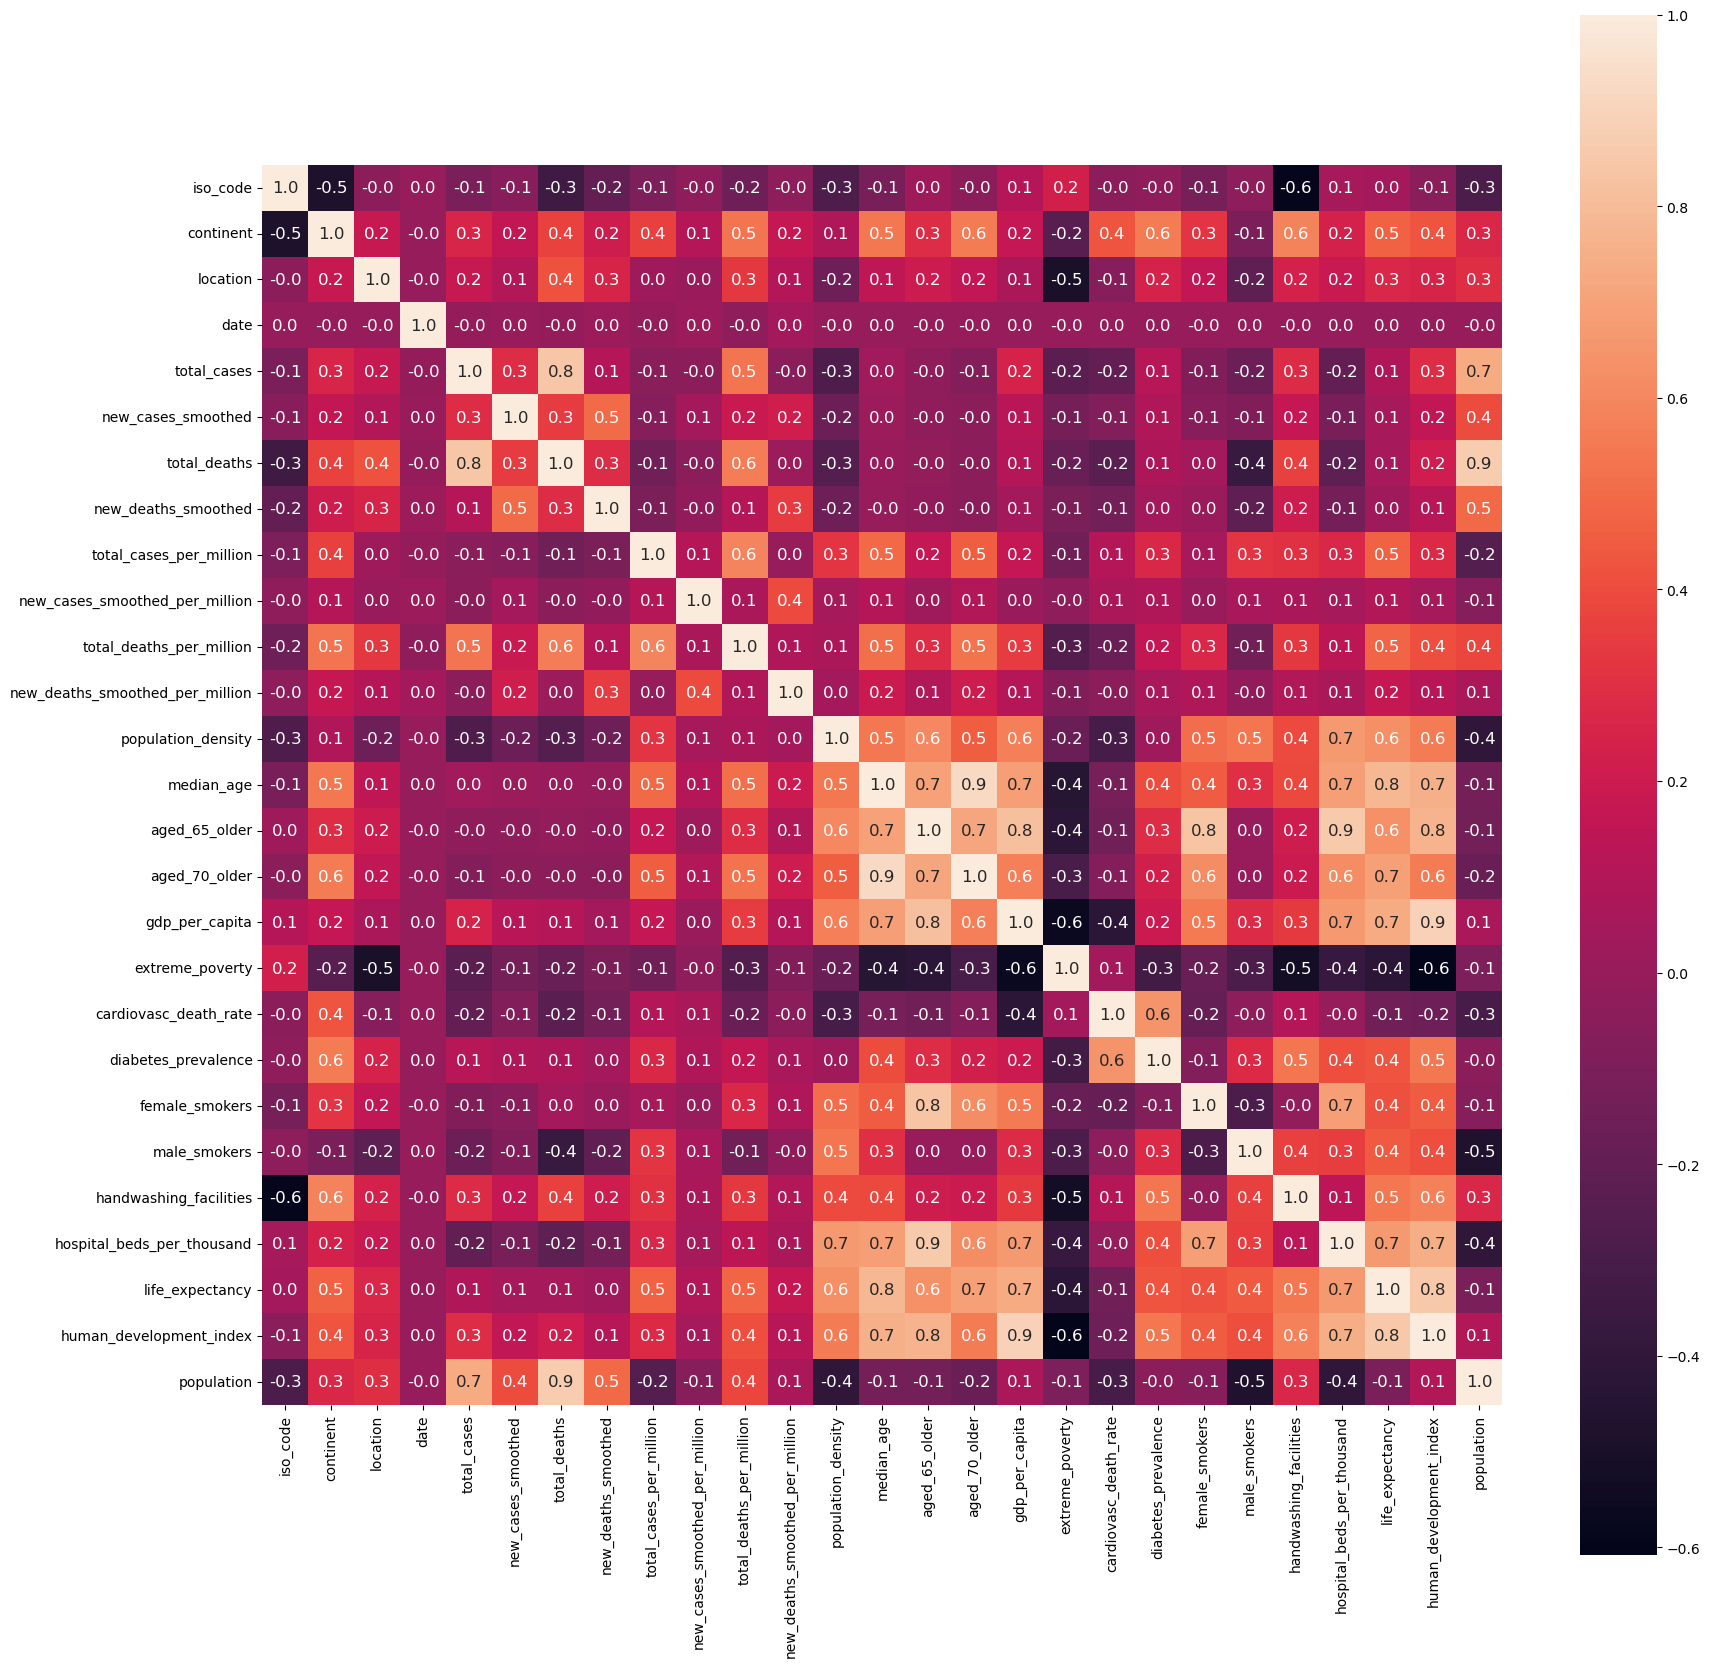

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation,square = True, fmt= '.1f', annot=True, annot_kws = {'size':12})

In [32]:
Countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18428 entries, 226944 to 245371
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         18428 non-null  int64  
 1   continent                        18428 non-null  int64  
 2   location                         18428 non-null  int64  
 3   date                             18428 non-null  int64  
 4   total_cases                      18428 non-null  float64
 5   new_cases_smoothed               18428 non-null  float64
 6   total_deaths                     18428 non-null  float64
 7   new_deaths_smoothed              18428 non-null  float64
 8   total_cases_per_million          18428 non-null  float64
 9   new_cases_smoothed_per_million   18428 non-null  float64
 10  total_deaths_per_million         18428 non-null  float64
 11  new_deaths_smoothed_per_million  18428 non-null  float64
 12  population_densit

In [33]:
G1 = Countries.iloc[ : , :20]
G1.shape


(18428, 20)

In [34]:

G2 = Countries.iloc[ : ,20 :27]
G2.shape

(18428, 7)

<Axes: >

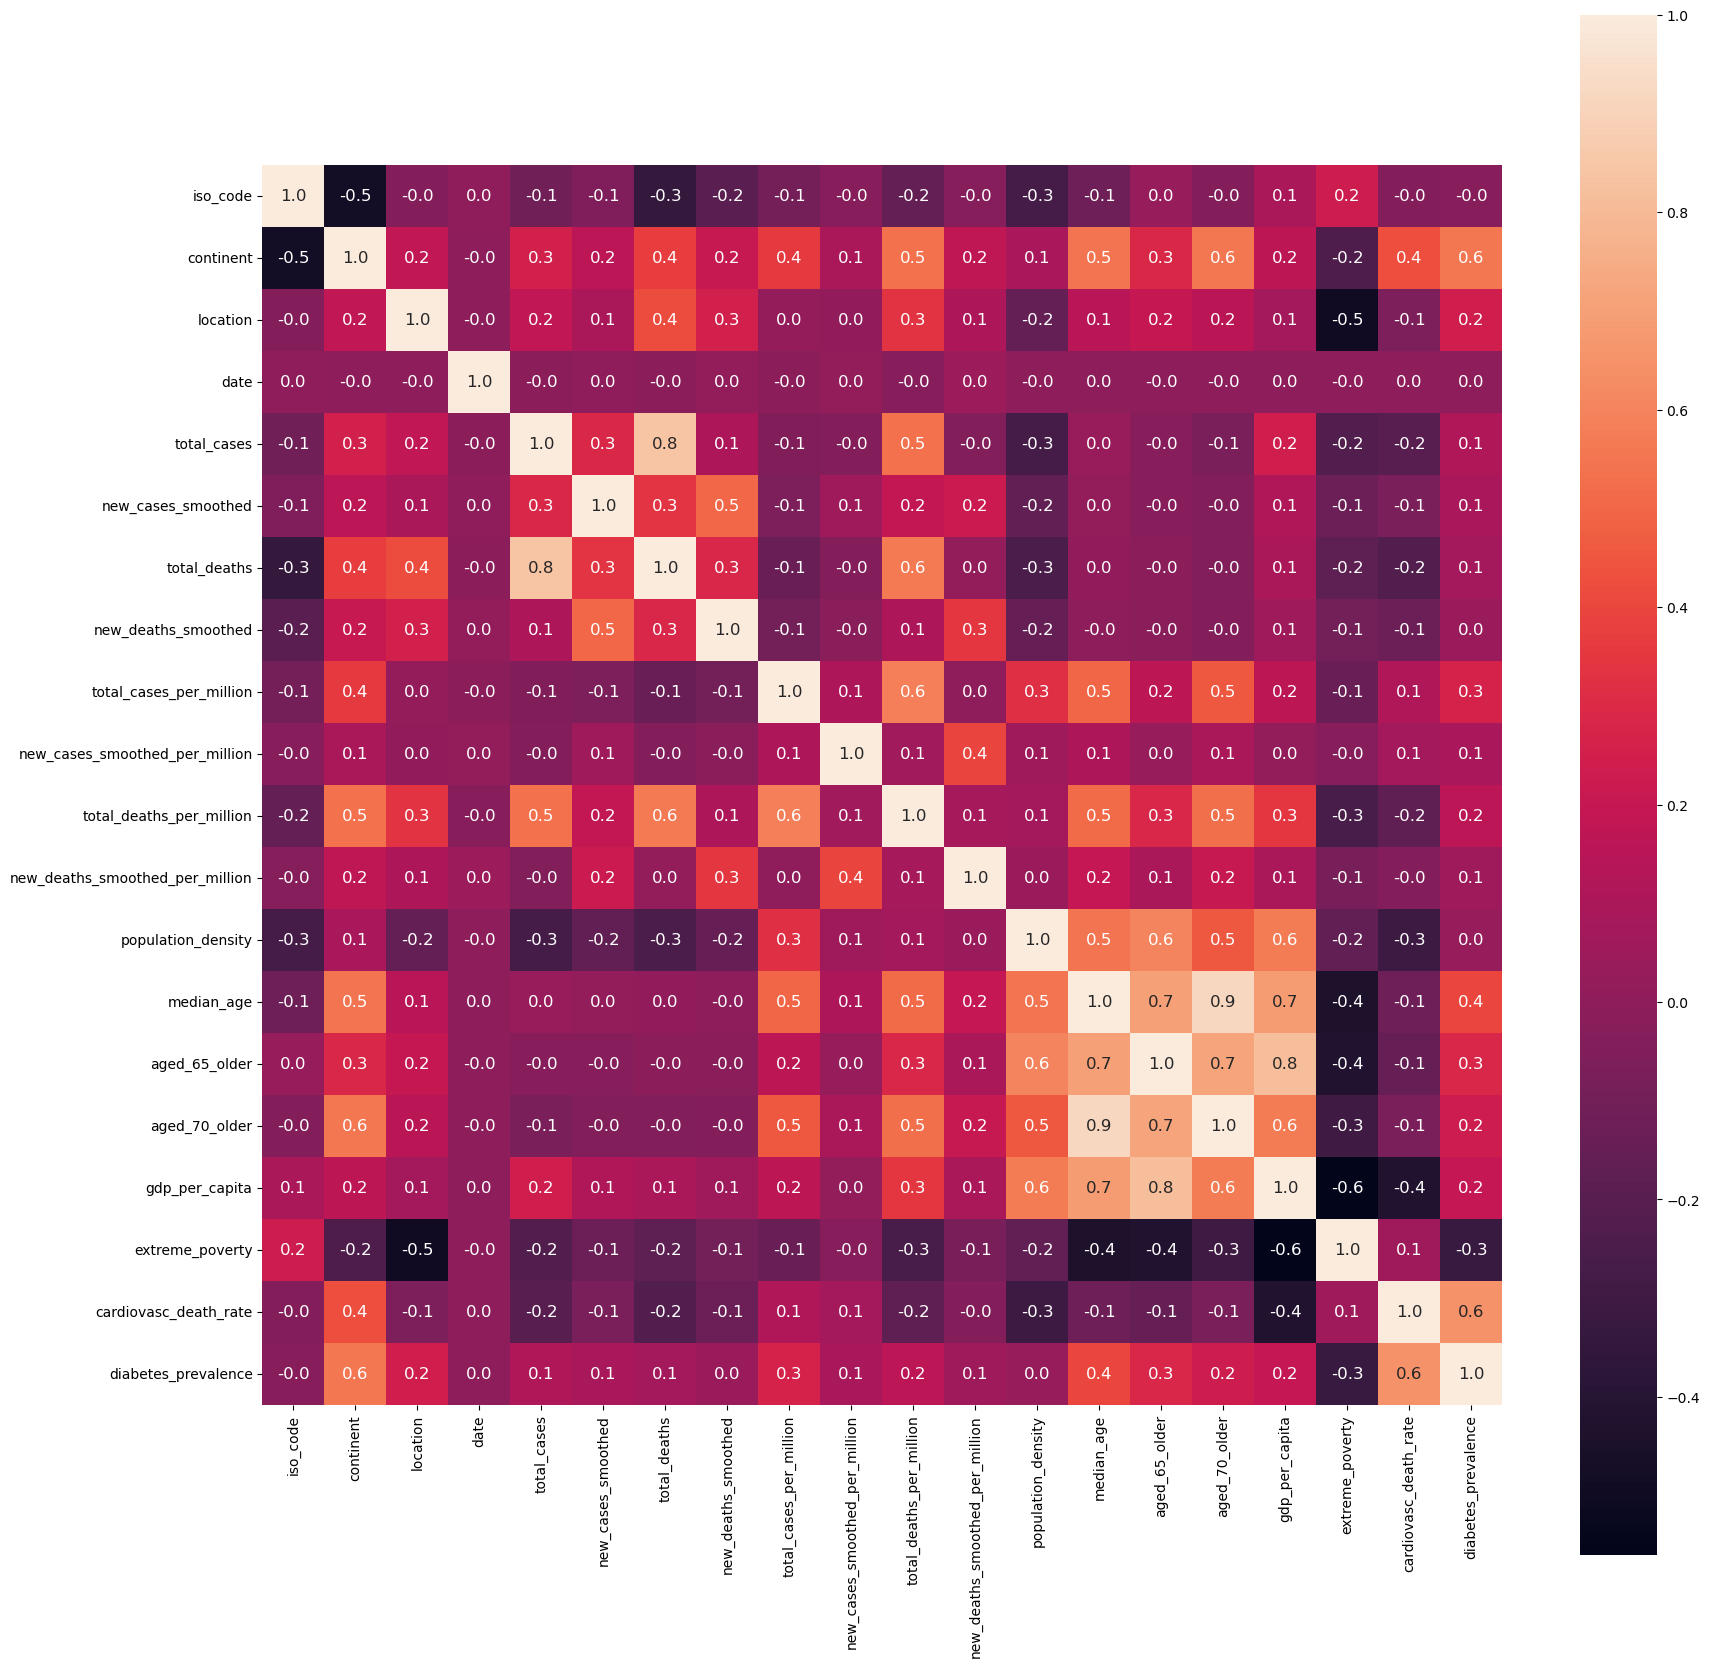

In [35]:
correlation = G1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation,square = True, fmt ='.1f',annot = True, annot_kws={'size':12})

In [36]:
G1 = G1.drop(['date'],axis = 1)
Countries = Countries.drop(['date'],axis = 1)

In [37]:
Countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18428 entries, 226944 to 245371
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         18428 non-null  int64  
 1   continent                        18428 non-null  int64  
 2   location                         18428 non-null  int64  
 3   total_cases                      18428 non-null  float64
 4   new_cases_smoothed               18428 non-null  float64
 5   total_deaths                     18428 non-null  float64
 6   new_deaths_smoothed              18428 non-null  float64
 7   total_cases_per_million          18428 non-null  float64
 8   new_cases_smoothed_per_million   18428 non-null  float64
 9   total_deaths_per_million         18428 non-null  float64
 10  new_deaths_smoothed_per_million  18428 non-null  float64
 11  population_density               18428 non-null  float64
 12  median_age       

<Axes: >

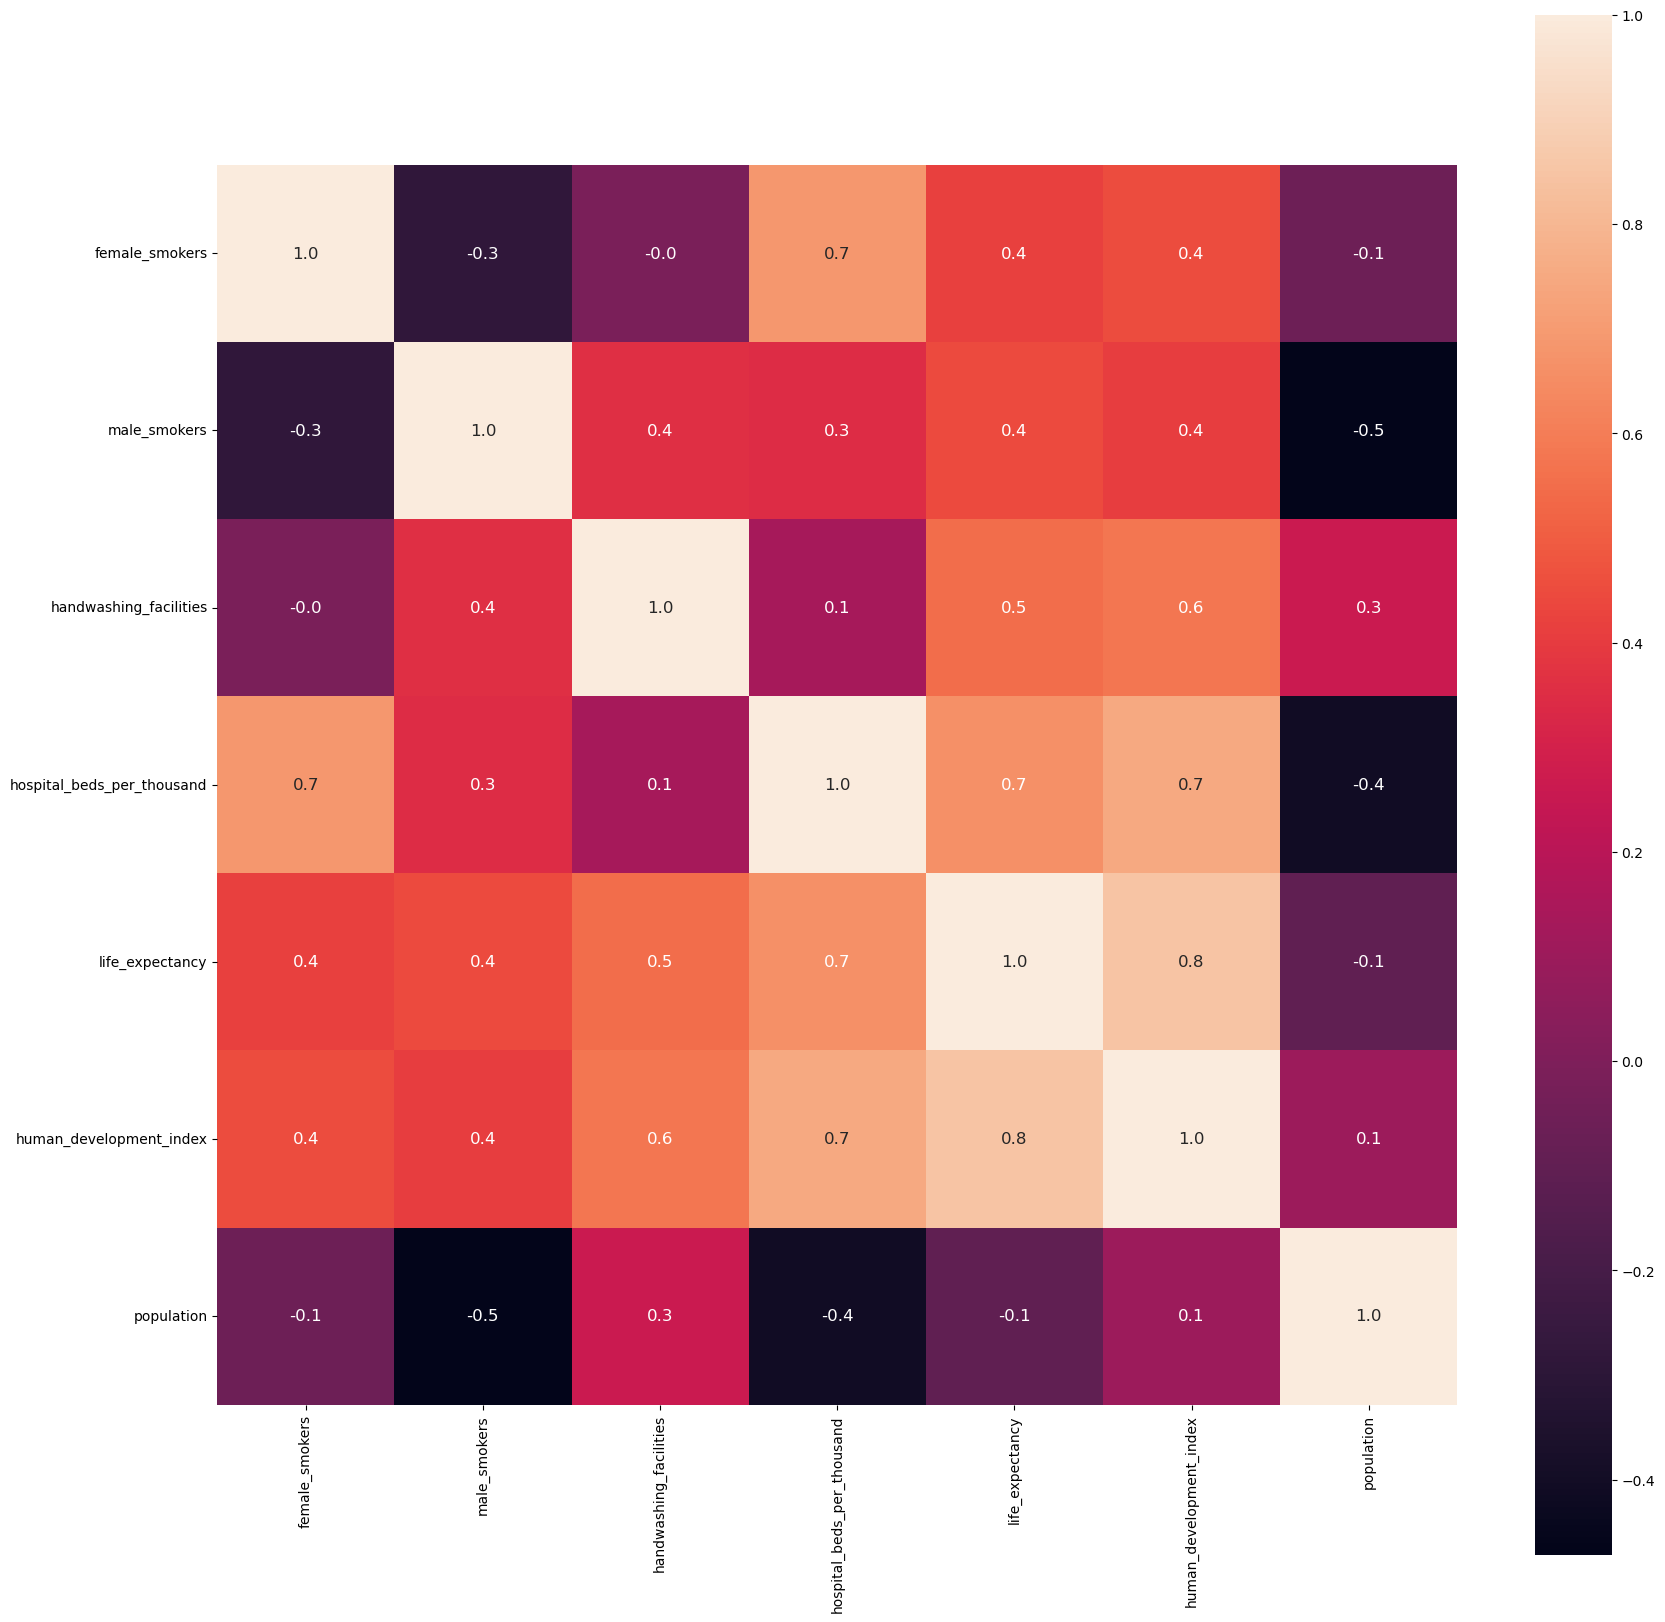

In [38]:
correlation = G2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation,square = True, fmt ='.1f',annot = True, annot_kws={'size':12})

In [39]:
G2 = G2.drop(['population'],axis = 1)
Countries = Countries.drop(['population'],axis = 1)

In [40]:
Countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18428 entries, 226944 to 245371
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         18428 non-null  int64  
 1   continent                        18428 non-null  int64  
 2   location                         18428 non-null  int64  
 3   total_cases                      18428 non-null  float64
 4   new_cases_smoothed               18428 non-null  float64
 5   total_deaths                     18428 non-null  float64
 6   new_deaths_smoothed              18428 non-null  float64
 7   total_cases_per_million          18428 non-null  float64
 8   new_cases_smoothed_per_million   18428 non-null  float64
 9   total_deaths_per_million         18428 non-null  float64
 10  new_deaths_smoothed_per_million  18428 non-null  float64
 11  population_density               18428 non-null  float64
 12  median_age       

### find feature column and label column and then separete its

In [41]:
Countries['location'].value_counts()

location
1     1684
10    1678
0     1674
2     1674
3     1674
5     1674
4     1674
6     1674
7     1674
8     1674
9     1674
Name: count, dtype: int64

In [42]:
X = Countries.drop('location',axis = 1)
Y  = Countries['location']

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18428 entries, 226944 to 245371
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         18428 non-null  int64  
 1   continent                        18428 non-null  int64  
 2   total_cases                      18428 non-null  float64
 3   new_cases_smoothed               18428 non-null  float64
 4   total_deaths                     18428 non-null  float64
 5   new_deaths_smoothed              18428 non-null  float64
 6   total_cases_per_million          18428 non-null  float64
 7   new_cases_smoothed_per_million   18428 non-null  float64
 8   total_deaths_per_million         18428 non-null  float64
 9   new_deaths_smoothed_per_million  18428 non-null  float64
 10  population_density               18428 non-null  float64
 11  median_age                       18428 non-null  float64
 12  aged_65_older    

In [44]:
Y.info()

<class 'pandas.core.series.Series'>
Index: 18428 entries, 226944 to 245371
Series name: location
Non-Null Count  Dtype
--------------  -----
18428 non-null  int64
dtypes: int64(1)
memory usage: 287.9 KB


### Data spliting

In [45]:
X_TRAIN ,X_TEST ,Y_TRAIN , Y_TEST = train_test_split(X,Y,test_size = 0.20, random_state = 49)
print('The size of training question ',len(X_TRAIN))
print('The size of training anser ',len(Y_TRAIN))
print('The size of testing question ',len(X_TEST))
print('The size of testing anser ',len(Y_TEST))

The size of training question  14742
The size of training anser  14742
The size of testing question  3686
The size of testing anser  3686


### Model 1 GaussianNB

In [46]:
muntazir = GaussianNB()

In [47]:
muntazir.fit(X_TRAIN,Y_TRAIN)

GaussianNB()

In [48]:
traning_data_predication = muntazir.predict(X_TRAIN)
print(traning_data_predication)

[ 3 10  1 ...  4  9  0]


In [49]:
accuracy = accuracy_score(Y_TRAIN,traning_data_predication)
print(accuracy)

0.9671686338353005


In [50]:

confusion_matrix(Y_TRAIN,traning_data_predication)


array([[1336,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1338,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1336,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1366,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1323,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1339,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  856,    0,    0,  474,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1351,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1366,    0,    0],
       [   0,    0,    0,    0,    0,    0,   10,    0,    0, 1305,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1342]])

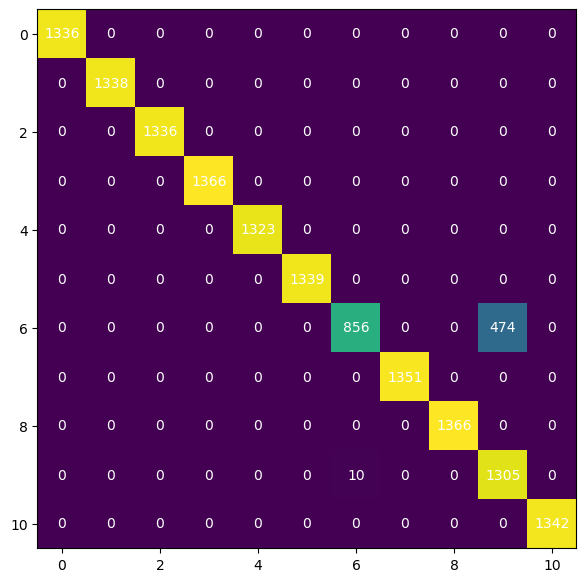

In [51]:
cm = confusion_matrix(Y_TRAIN,traning_data_predication)
fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
for i in range(11):
    for j in range(11):
        ax.text(j,i,cm[i,j],ha = 'center',va='center',color='white')
plt.show()

In [52]:
testing_data_predication = muntazir.predict(X_TEST)
print(testing_data_predication)

[1 7 2 ... 3 2 8]


In [53]:
accuracy = accuracy_score(Y_TEST,testing_data_predication)
print(accuracy)

0.9717851329354313


In [54]:

confusion_matrix(Y_TEST,testing_data_predication)

array([[338,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 346,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 338,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 308,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 351,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 335,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 244,   0,   0, 100,   0],
       [  0,   0,   0,   0,   0,   0,   0, 323,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 308,   0,   0],
       [  0,   0,   0,   0,   0,   0,   4,   0,   0, 355,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 336]])

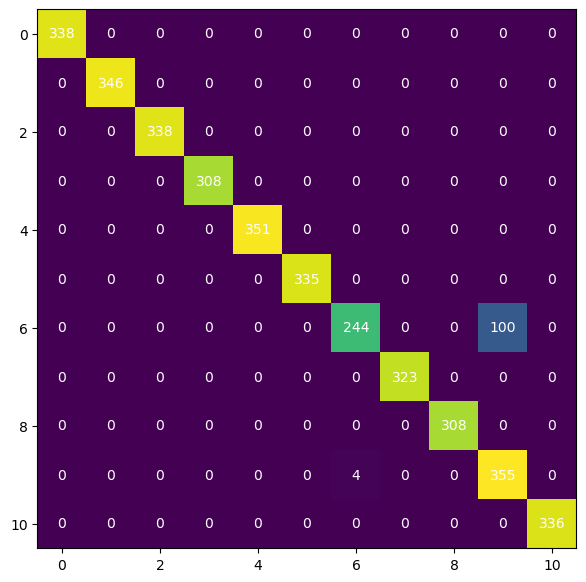

In [55]:
cm = confusion_matrix(Y_TEST,testing_data_predication)
fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
for i in range(11):
    for j in range(11):
        ax.text(j,i,cm[i,j],ha = 'center',va='center',color='white')
plt.show()

### Model 2 LogisticRegression

In [56]:
muntazir = LogisticRegression(solver = 'liblinear',random_state = 10)

In [57]:
muntazir.fit(X_TRAIN,Y_TRAIN)

C:\Users\icc\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(random_state=10, solver='liblinear')

In [58]:
traning_data_predication = muntazir.predict(X_TRAIN)
print(traning_data_predication)

[ 3 10  1 ...  4  9  0]


In [59]:
accuracy = accuracy_score(Y_TRAIN,traning_data_predication)
print(accuracy)

0.9461402794736128


In [60]:
confusion_matrix(Y_TRAIN,traning_data_predication)

array([[1329,    0,    0,    0,    0,    7,    0,    0,    0,    0,    0],
       [   0, 1338,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1336,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1295,    0,   71,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1323,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1339,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  858,    0,   52,  420,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1351,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1217,  149,    0],
       [   0,    0,    0,    0,    0,    0,   72,    0,    0, 1243,    0],
       [   0,   23,    0,    0,    0,    0,    0,    0,    0,    0, 1319]])

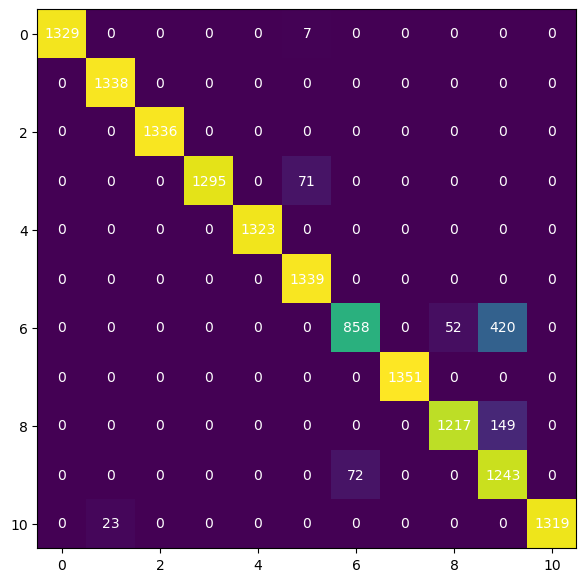

In [61]:
cm = confusion_matrix(Y_TRAIN,traning_data_predication)
fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
for i in range(11):
    for j in range(11):
        ax.text(j,i,cm[i,j],ha = 'center',va='center',color='white')
plt.show()

In [62]:
testing_data_predication = muntazir.predict(X_TEST)
print(testing_data_predication)

[1 7 2 ... 3 2 8]


In [63]:
accuracy = accuracy_score(Y_TEST,testing_data_predication)
print(accuracy)

0.9514378730330982


In [64]:
confusion_matrix(Y_TEST,testing_data_predication)

array([[338,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 346,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 338,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 295,   0,  13,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 351,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 335,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 242,   0,  11,  91,   0],
       [  0,   0,   0,   0,   0,   0,   0, 323,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 268,  40,   0],
       [  0,   0,   0,   0,   0,   0,  19,   0,   0, 340,   0],
       [  0,   5,   0,   0,   0,   0,   0,   0,   0,   0, 331]])

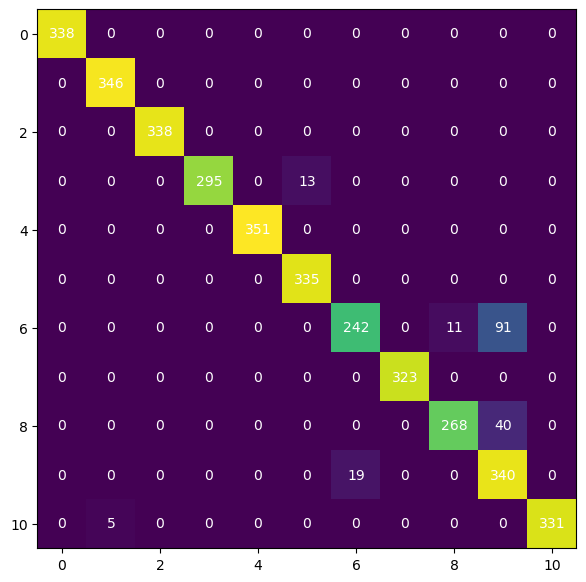

In [65]:
cm = confusion_matrix(Y_TEST,testing_data_predication)
fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
for i in range(11):
    for j in range(11):
        ax.text(j,i,cm[i,j],ha = 'center',va='center',color='white')
plt.show()

### Model 3 SVC

In [66]:
muntazir = svm.SVC(kernel = 'linear')

In [67]:
muntazir.fit(X_TRAIN,Y_TRAIN)

SVC(kernel='linear')

In [68]:
traning_data_predication = muntazir.predict(X_TRAIN)
print(traning_data_predication)

[ 3 10  1 ...  4  9  0]


In [69]:
accuracy = accuracy_score(Y_TRAIN,traning_data_predication)
print(accuracy)

0.997693664360331


In [70]:
confusion_matrix(Y_TRAIN,traning_data_predication)

array([[1336,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1338,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1336,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1366,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1323,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1339,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1303,    0,    0,   27,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1351,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1366,    0,    0],
       [   0,    0,    0,    0,    0,    0,    7,    0,    0, 1308,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1342]])

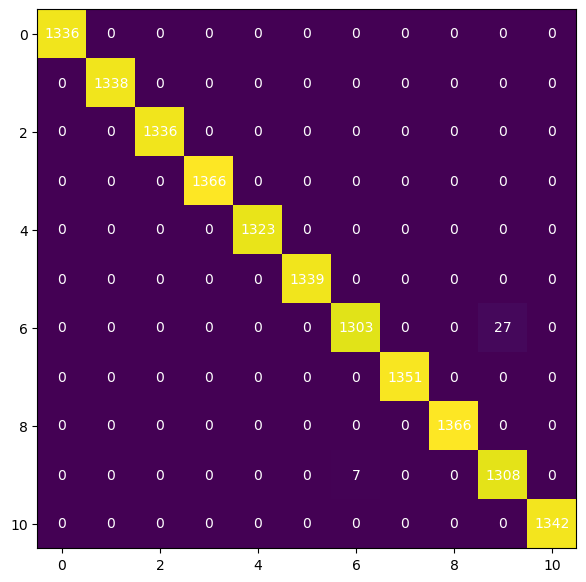

In [71]:
cm = confusion_matrix(Y_TRAIN,traning_data_predication)
fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
for i in range(11):
    for j in range(11):
        ax.text(j,i,cm[i,j],ha = 'center',va='center',color='white')
plt.show()

In [72]:
testing_data_predication = muntazir.predict(X_TEST)
print(testing_data_predication)

[1 7 2 ... 3 2 8]


In [73]:
accuracy = accuracy_score(Y_TEST,testing_data_predication)
print(accuracy)

0.9978296256104178


In [74]:
confusion_matrix(Y_TEST,testing_data_predication)

array([[338,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 346,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 338,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 308,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 351,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 335,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 336,   0,   0,   8,   0],
       [  0,   0,   0,   0,   0,   0,   0, 323,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 308,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 359,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 336]])

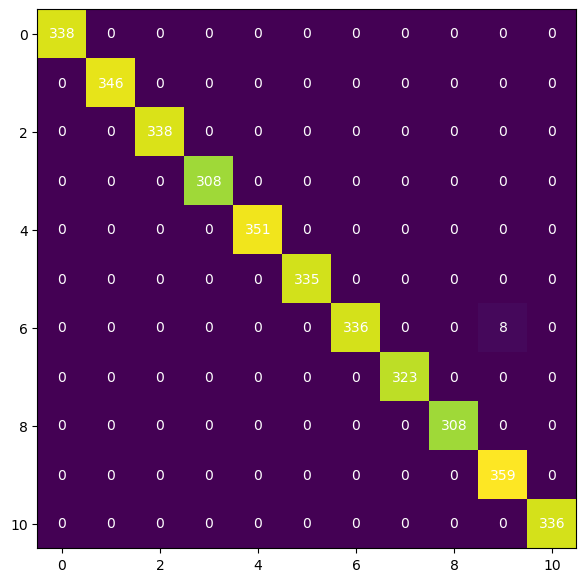

In [75]:
cm = confusion_matrix(Y_TEST,testing_data_predication)
fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
for i in range(11):
    for j in range(11):
        ax.text(j,i,cm[i,j],ha = 'center',va='center',color='white')
plt.show()

### Model 4  DecisionTreeClassifier

In [76]:
muntazir = DecisionTreeClassifier(random_state = 70)

In [77]:
muntazir.fit(X_TRAIN,Y_TRAIN)

DecisionTreeClassifier(random_state=70)

In [78]:
traning_data_predication = muntazir.predict(X_TRAIN)
print(traning_data_predication)

[ 3 10  1 ...  4  9  0]


In [79]:
accuracy = accuracy_score(Y_TRAIN,traning_data_predication)
print(accuracy)

1.0


In [80]:
confusion_matrix(Y_TRAIN,traning_data_predication)

array([[1336,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1338,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1336,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1366,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1323,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1339,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1330,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1351,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1366,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1315,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1342]])

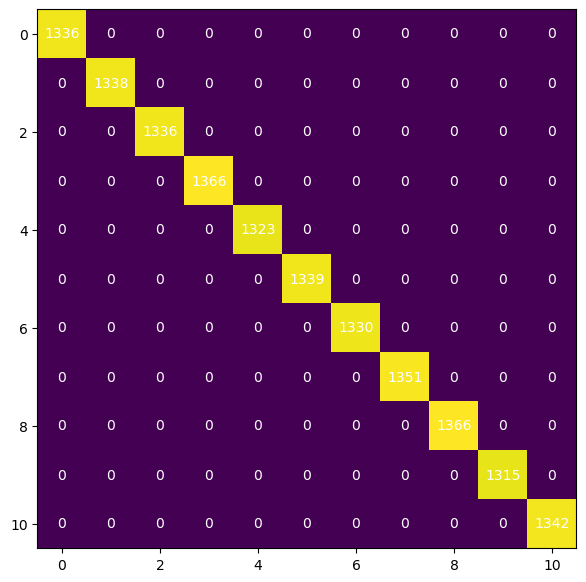

In [81]:
cm = confusion_matrix(Y_TRAIN,traning_data_predication)
fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
for i in range(11):
    for j in range(11):
        ax.text(j,i,cm[i,j],ha = 'center',va='center',color='white')
plt.show()

In [82]:
testing_data_predication = muntazir.predict(X_TEST)
print(testing_data_predication)

[1 7 2 ... 3 2 8]


In [83]:
accuracy = accuracy_score(Y_TEST,testing_data_predication)
print(accuracy)

1.0


In [84]:
confusion_matrix(Y_TEST,testing_data_predication)

array([[338,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 346,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 338,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 308,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 351,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 335,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 344,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 323,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 308,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 359,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 336]])

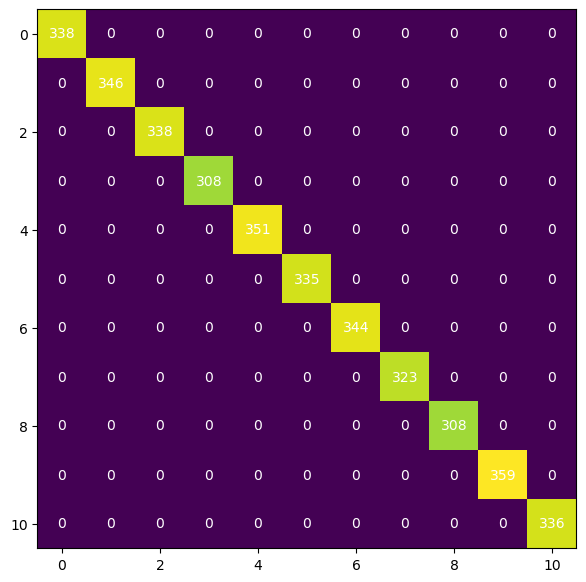

In [85]:
cm = confusion_matrix(Y_TEST,testing_data_predication)
fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
for i in range(11):
    for j in range(11):
        ax.text(j,i,cm[i,j],ha = 'center',va='center',color='white')
plt.show()

### Model 5 RandomForestClassifier

In [86]:
muntazir =  RandomForestClassifier(n_estimators = 7,random_state = 15)

In [87]:
muntazir.fit(X_TRAIN,Y_TRAIN)

RandomForestClassifier(n_estimators=7, random_state=15)

In [88]:
traning_data_predication = muntazir.predict(X_TRAIN)
print(traning_data_predication)

[ 3 10  1 ...  4  9  0]


In [89]:
accuracy = accuracy_score(Y_TRAIN,traning_data_predication)
print(accuracy)

1.0


In [90]:
confusion_matrix(Y_TRAIN,traning_data_predication)

array([[1336,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1338,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1336,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1366,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1323,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1339,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1330,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1351,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1366,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1315,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1342]])

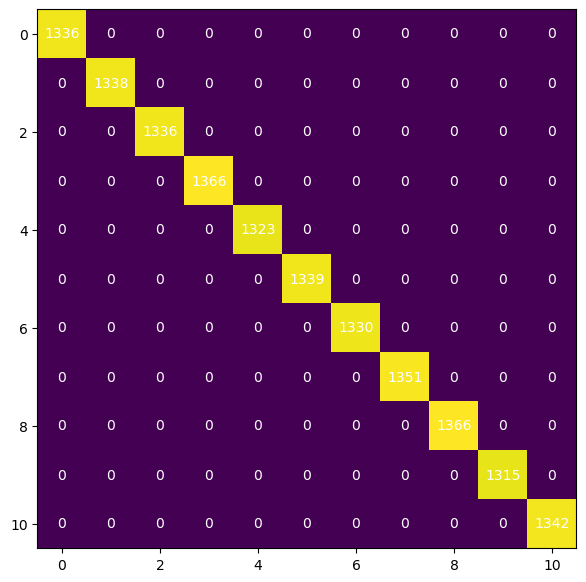

In [91]:
cm = confusion_matrix(Y_TRAIN,traning_data_predication)
fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
for i in range(11):
    for j in range(11):
        ax.text(j,i,cm[i,j],ha = 'center',va='center',color='white')
plt.show()

In [92]:
testing_data_predication = muntazir.predict(X_TEST)
print(testing_data_predication)

[1 7 2 ... 3 2 8]


In [93]:
accuracy = accuracy_score(Y_TEST,testing_data_predication)
print(accuracy)

1.0


In [94]:
confusion_matrix(Y_TEST,testing_data_predication)

array([[338,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 346,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 338,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 308,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 351,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 335,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 344,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 323,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 308,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 359,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 336]])

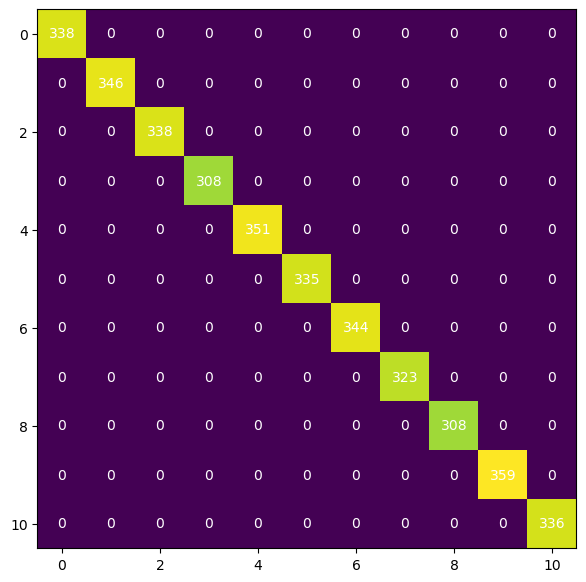

In [95]:
cm = confusion_matrix(Y_TEST,testing_data_predication)
fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
for i in range(11):
    for j in range(11):
        ax.text(j,i,cm[i,j],ha = 'center',va='center',color='white')
plt.show()

## Conclusion

In [96]:
# All models works good but I think SVM model is Best because its Training Accuracey is 0.99 and Testing Accuracy is also0.99